In [ ]:
!pip install imbalanced-learn
!pip install ace-tools

In [11]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
# Applying Label Encoding to non-numeric columns in both datasets

diabetes_dataset = pd.read_excel("10k_diabetes.xlsx")


# Copying the original datasets to avoid modifying the original data
diabetes_dataset_encoded = diabetes_dataset.copy()

# Identifying non-numeric columns in both datasets
diabetes_non_numeric_columns = diabetes_dataset.select_dtypes(exclude=['float64', 'int64']).columns

# Initializing LabelEncoder
label_encoder = LabelEncoder()


# Encoding non-numeric columns in diabetes_dataset
for column in diabetes_non_numeric_columns:
    diabetes_dataset_encoded[column] = label_encoder.fit_transform(diabetes_dataset[column].astype(str))

diabetes_dataset_encoded

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted,diag_1_desc,diag_2_desc,diag_3_desc
0,3,0,0,5,1,11,3,2,13,2,...,0,0,0,0,1,0,0,415,158,311
1,2,0,9,1,5,13,2,13,4,9,...,1,0,0,0,1,1,0,124,67,53
2,5,1,3,3,2,14,6,11,15,5,...,0,0,0,0,0,1,0,12,96,329
3,5,0,2,2,5,7,0,6,10,39,...,0,0,0,0,0,0,0,250,320,36
4,2,0,1,6,5,9,9,8,0,24,...,0,0,0,0,0,1,0,36,399,119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,1,3,3,4,4,5,3,14,7,...,1,0,0,0,1,1,0,53,80,91
9996,4,1,9,4,1,11,7,4,1,13,...,0,0,0,0,0,0,0,240,237,21
9997,2,1,9,0,2,14,9,1,8,44,...,0,0,0,0,1,1,0,369,273,317
9998,1,1,5,7,4,12,4,3,3,35,...,0,0,0,0,1,0,0,173,377,9


In [12]:
from sklearn.impute import KNNImputer
import pandas as pd

# Selecting the specific columns to impute
columns_to_impute = ['gender', 'admission_type_id', 'num_medications', 'number_inpatient', 'number_diagnoses', 'readmitted']

# Using KNN Imputer to fill missing values in the selected columns
knn_imputer = KNNImputer(n_neighbors=5)
diabetes_dataset_encoded[columns_to_impute] = knn_imputer.fit_transform(diabetes_dataset_encoded[columns_to_impute])

# Converting the selected columns to integer type
diabetes_dataset_encoded[columns_to_impute] = diabetes_dataset_encoded[columns_to_impute].astype(int)

# Check the imputed data
#print(diabetes_dataset_encoded[columns_to_impute].isnull().sum())  # Should be 0 if imputation was successful

diabetes_dataset_encoded


,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted,diag_1_desc,diag_2_desc,diag_3_desc
0,3,0,0,5,1,11,3,2,13,2,...,0,0,0,0,1,0,0,415,158,311
1,2,0,9,1,5,13,2,13,4,9,...,1,0,0,0,1,1,0,124,67,53
2,5,1,3,3,2,14,6,11,15,5,...,0,0,0,0,0,1,0,12,96,329
3,5,0,2,2,5,7,0,6,10,39,...,0,0,0,0,0,0,0,250,320,36
4,2,0,1,6,5,9,9,8,0,24,...,0,0,0,0,0,1,0,36,399,119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,1,3,3,4,4,5,3,14,7,...,1,0,0,0,1,1,0,53,80,91
9996,4,1,9,4,1,11,7,4,1,13,...,0,0,0,0,0,0,0,240,237,21
9997,2,1,9,0,2,14,9,1,8,44,...,0,0,0,0,1,1,0,369,273,317
9998,1,1,5,7,4,12,4,3,3,35,...,0,0,0,0,1,0,0,173,377,9


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Selecting features and target
X = diabetes_dataset_encoded.drop(columns=['readmitted'])



y = diabetes_dataset_encoded['readmitted']


y = y.astype(int)
# Scaling numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Balancing the Dataset using SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_scaled, y)

y_balanced_series = pd.Series(y_balanced)
# Check the distribution of the target variable after balancing
print("Balanced Target Distribution:\n", y_balanced_series.value_counts())

# Step 3: Model Training and Evaluation
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

Balanced Target Distribution:
 readmitted
0    7019
1    7019
Name: count, dtype: int64


In [14]:
# Save the balanced dataset
balanced_df = pd.DataFrame(X_balanced, columns=X.columns)
balanced_df['readmission'] = y_balanced.values  # Add the target variable to the DataFrame

# Save as CSV
balanced_df.to_csv('path_to_save_balanced_dataset.csv', index=False)  # Replace with your desired path


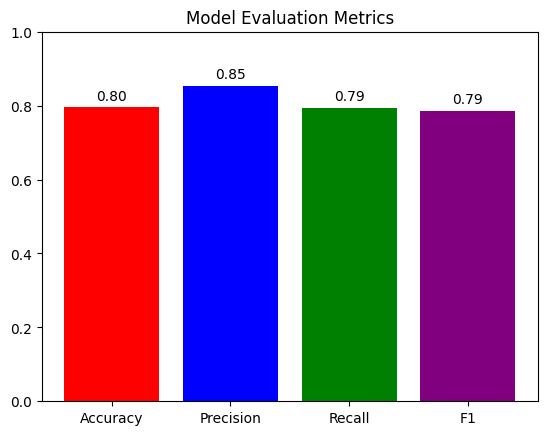

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Step 1: Define the Random Forest model and parameter grid for tuning
rf_model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Step 2: Perform Grid Search for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy', timeout=3600)
grid_search.fit(X_train, y_train)

# Retrieve the best model
best_rf_model = grid_search.best_estimator_

# Step 3: Predict and evaluate with the best model
y_pred = best_rf_model.predict(X_test)
#accuracy = accuracy_score(y_test, y_pred)
#report = classification_report(y_test, y_pred)

#print("Classification report \n",report)


# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Collect all metrics
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1': f1
}

# Plotting
fig, ax = plt.subplots()
categories = list(metrics.keys())
values = list(metrics.values())

# Adding colors
colors = ['red', 'blue', 'green', 'purple']
ax.bar(categories, values, color=colors)

for i, v in enumerate(values):
    ax.text(i, v + 0.02, f"{v:.2f}", ha='center', color='black')

plt.ylim(0, 1)
plt.title('Model Evaluation Metrics')
plt.show()
